In [5]:
! pip install python-mnist
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
import pandas as pd

! pip install python-mnist

from mnist import MNIST
emnist=MNIST('sample_data')

  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [6]:
images, labels = emnist.load_training()
print('f')

testIM, testLabel=emnist.load_testing()
print('k')

n_images=np.array(images)
p=np.shape(n_images)
print('Shape of Training Images')
print(p)

n_labels=np.array(labels)
x=np.shape(n_labels)
print('Shape of Training Labels')
print(x)


f
k
Shape of Training Images
(112800, 784)
Shape of Training Labels
(112800,)


Shape of Testing Images
(18800, 784)
Shape of Testing Labels
(18800,)
Reshaped Image


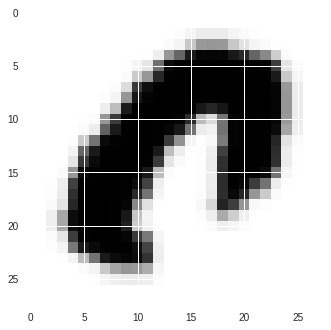

Grey Scale Image


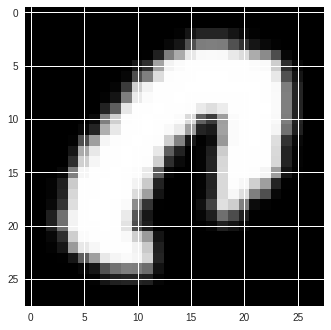

Pixel Value Of Training Image
0
95


In [7]:
import numpy as np
n_testIM=np.array(testIM)
p1=np.shape(n_testIM)
print('Shape of Testing Images')
print(p1)
n_testLabel=np.array(testLabel)
p2=np.shape(n_testLabel)
print('Shape of Testing Labels')
print(p2)

print('Reshaped Image')
display_1=np.array(n_images[10000]).reshape(28,28)
plt.imshow(display_1)
plt.show()

print('Grey Scale Image')
display_2=np.array(n_images[10000]).reshape(28,28)
plt.imshow(display_2, cmap='gist_gray')
plt.show()

#pixel Value <=255
#Column value <=784
print('Pixel Value Of Training Image')
print(n_images[2][675])
print(n_images[10][435])


In [8]:
#Scaling between 0 and 1 usinf MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(n_images)
train_images=scaler.transform(n_images)
scaler.fit(testIM)
test_images=scaler.transform(testIM)

print('Scaled Value of Training Image')
print(train_images[2][675])
print(train_images[10][435])

print('Pixel Value Of Testing Image')
print(n_testIM[2][675])
print(n_testIM[10][435])
print(n_testIM[10])


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Scaled Value of Training Image
0.0
0.37254901960784315
Pixel Value Of Testing Image
0
127
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   8  37  32   4   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   7  38  84 208 249 245 204  83  22
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
   9  95 216 233 254 254 254 254 232 159   8   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   4  91 215 222 251 254 254 245 217 217 233
 254 253 115   0   0   0   0   0   0   0   0   0   0   0   0   3  91 202
 247 254 252 249 208 127  34   5   4  24 209 254 208   8   0   0   0   0
   0   0   0   0   0   0   1  79 221 253 254 244 177 125  46   8   0   0
   0   0 140 250 245  34   0   0  

In [0]:
%store n_images
%store n_labels
%store n_testIM
%store n_testLabel

Stored 'n_images' (ndarray)
Stored 'n_labels' (ndarray)
Stored 'n_testIM' (ndarray)
Stored 'n_testLabel' (ndarray)


In [9]:
#Converting categorical Data into Binary vectors
#Rows=112,800 Columns=47
re_shape=n_labels.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
one.fit(re_shape)
train_labels=one.transform(re_shape).toarray()


re_shape1=n_testLabel.reshape(-1,1)
one.fit(re_shape1)
test_labels=one.transform(re_shape1).toarray()
print('fd')

fd


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [10]:








#building model by keras

! pip install keras
# import the necessary packages
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

from keras.layers.core import Activation

from keras import backend as K




In [80]:

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model
  
print('sdfcs')

(trainX, testX, trainY, testY) = train_test_split(train_images / 255.0, train_labels, test_size=0.25, random_state=42)


from keras.optimizers import SGD, RMSprop,adam
from keras.callbacks import ModelCheckpoint
import tensorflow as tf 

output_path = "sample_data/cp_as.ckpt"
checkpoint = ModelCheckpoint(output_path, monitor="val_loss",save_best_only=True, verbose=1)
callbacks = [checkpoint]

#checkpoint_path ="sample_data/cp.ckpt"
#cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

print("[INFO] compiling model...")
opt = Adam(lr=1e-3)
model = LeNet.build(width=28, height=28, depth=1, classes=47)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


sdfcs
[INFO] compiling model...


In [81]:
from keras.optimizers import SGD
trainX = trainX.reshape(-1,28,28,1)
testX=testX.reshape(-1,28,28,1)
#H = model.fit(train_images.reshape(-1,28,28,1), train_labels,batch_size=120, validation_data=(trainY, testY), epochs=50, verbose=2,callbacks=[cp_callback])

print('f')

print("[INFO] training network...")
#H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=20, callbacks=cp_callback, verbose=2)
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=10, callbacks=callbacks, verbose=1)

f
[INFO] training network...
Train on 84600 samples, validate on 28200 samples
Epoch 1/10
84600/84600 [==============================] - 11s 134us/step - loss: 2.1241 - acc: 0.4190 - val_loss: 1.3189 - val_acc: 0.6162

Epoch 00001: val_loss improved from inf to 1.31889, saving model to sample_data/cp_as.ckpt
Epoch 2/10
84600/84600 [==============================] - 10s 116us/step - loss: 1.1449 - acc: 0.6622 - val_loss: 0.9844 - val_acc: 0.7044

Epoch 00002: val_loss improved from 1.31889 to 0.98440, saving model to sample_data/cp_as.ckpt
Epoch 3/10
84600/84600 [==============================] - 10s 118us/step - loss: 0.9106 - acc: 0.7231 - val_loss: 0.8360 - val_acc: 0.7413

Epoch 00003: val_loss improved from 0.98440 to 0.83599, saving model to sample_data/cp_as.ckpt
Epoch 4/10
84600/84600 [==============================] - 10s 119us/step - loss: 0.7876 - acc: 0.7550 - val_loss: 0.7554 - val_acc: 0.7623

Epoch 00004: val_loss improved from 0.83599 to 0.75535, saving model to sample_d

In [0]:
model.save_weights('sample_data/mnistCNN.h5')

In [0]:
! pip install opencv-python
import cv2

In [0]:

model.load_weights('sample_data/cp_as.ckpt')
#arr=np.array(reshape_img/255).reshape(1,28,28,1)


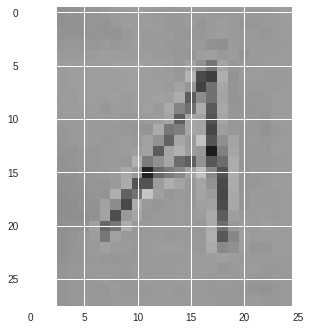

In [77]:
from skimage import transform,io
from PIL import Image,ImageFilter
import PIL.ImageOps
# read in grey-scale
st='sample_data/capA.jpg'

im_open = Image.open(st)
im = Image.open(st).convert('LA') #conversion to gray-scale image
width = float(im.size[0])
height = float(im.size[1])
newImage = Image.new('L',(28,28),(255))


if width > height: #check which dimension is bigger
        #Width is bigger. Width becomes 20 pixels.
    nheight = int(round((28.0/width*height),0)) #resize height according to ratio width
    if (nheight == 0): #rare case but minimum is 1 pixel
        nheight = 1  
       # resize and sharpen
    img = im.resize((28,nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    wtop = int(round(((28 - nheight)/2),0)) #caculate horizontal pozition
    newImage.paste(img, (0,wtop)) #paste resized image on white canvas
else:
    #Height is bigger. Heigth becomes 20 pixels. 
    nwidth = int(round((28.0/height*width),0)) #resize width according to ratio height
    if (nwidth == 0): #rare case but minimum is 1 pixel
        nwidth = 1
     # resize and sharpen
    img = im.resize((nwidth,28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    wleft = int(round(((28 - nwidth)/2),0)) #caculate vertical pozition
    newImage.paste(img, (wleft,0)) #paste resize
    
    #newImage= PIL.ImageOps.invert(newImage)
    #print(np.array(newImage))
    #print(np.array(n_testIM[100]))
    plt.imshow(newImage)
    plt.show()


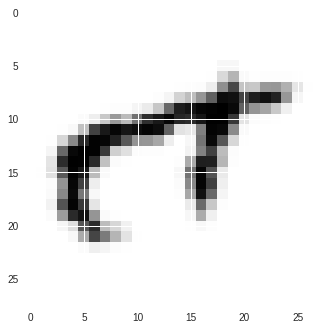

40
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [79]:
newImage = np.array(newImage)
prediction=model.predict((test_images[852]).reshape(1,28,28,1))[0]
plt.imshow(test_images[852].reshape(28,28))
plt.show()
print(np.argmax(prediction))
print(test_labels[852])

In [0]:
labels_dict ={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'l',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'u',31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'d',39:'e',40:'f',41:'g',42:'h',43:'n',44:'q',45:'r',46:'t'}

In [0]:
print("The predicted character is {}".format(labels_dict[np.argmax(prediction)]))

The predicted character is Q


In [0]:
#another method

In [0]:
   from PIL import Image
   import numpy as np

In [0]:
    img = Image.open('sample_data/30.jpg').convert("L")
    img = img.resize((28,28))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    

In [0]:
model1=build_m(28,28,1,47)
model1.load_weights('sample_data/mnistCNN.h5')
prediction=model1.predict(im2arr)[0]
print(np.argmax(prediction))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 50)        25050     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1800)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 500)               900500    
_________________________________________________________________
activation_41 (Activation)   (None, 500)               0         
__________